**COVAX**

It is an intitative by GAVI(Global Alliance for Vaccines and Immunization), CEPI(Coalition for Epidemic Preparedness Innovations) and WHO aimed at equitable access to Covid-19 vaccines. This initiative was started in April 2020 with the idea that COVAX will act as a platform that will support the research, development and manufacturing of a wide range of COVID-19 vaccine candidates, and negotiate their pricing. All participating countries, regardless of income levels, will have equal access to these vaccines once they are developed. 80 high income countries along with 92 low and middle income companies are a part of COVAX now.**bold text**

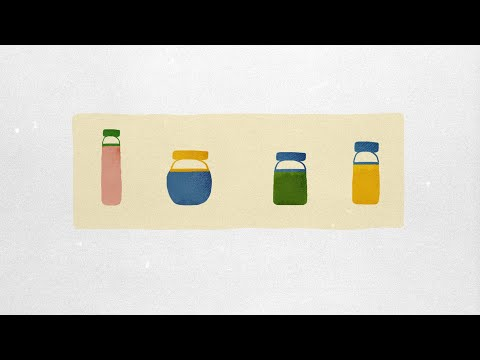

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('5opR6x6NMpQ',700,400)

**Why do we need COVAX and how does it work?**
COVAX is necessary because without it there is a very real risk that the majority of people in the world will go unprotected against SARS-CoV-2, and this would allow the virus and its impact to continue unabated. COVAX has been created to maximise our chances of successfully developing COVID-19 vaccines and manufacture them in the quantities needed to end this crisis, and in doing so ensure that ability to pay does not become a barrier to accessing them.

**It works because**:
. **For lower-income funded nations**, who would otherwise be unable to afford these vaccines, as well as a number of higher-income self-financing countries that have no bilateral deals with manufacturers, COVAX is quite literally a lifeline and the only viable way in which their citizens will get access to COVID-19 vaccines.

**For the wealthiest self-financing countries**, some of which may also be negotiating bilateral deals with vaccine manufacturers, it serves as an invaluable insurance policy to protect their citizens, both directly and indirectly. On the one hand it will provide direct protection by increasing their chances of securing vaccine doses. Yet, at the same time by procuring COVID-19 vaccines through COVAX, these nations will also indirectly protect their citizens by reducing the chances of resurgence by ensuring that the rest of the world gets access to doses too.

# **How can a country participate?**
Based on the information above, I think you can guess that there are broadly two ways of participating:

**Advanced Market Commitment(AMC)** : This scheme supports access to COVID-19 vaccines for lower-income economies. Combined, these make possible the participation of all countries, regardless of ability to pay. Countries participating through AMC can either be on the giving or recieving end.


**Self-Financing Countries** : For these countries COVAX serves as a critical insurance policy that will significantly increase their chances of securing vaccines, even if their own bilateral deals fail. And by pooling resources through the Facility, participating countries and economies are essentially helping to increase the world’s chances of bringing about COVID-19 vaccines as quickly as possible.
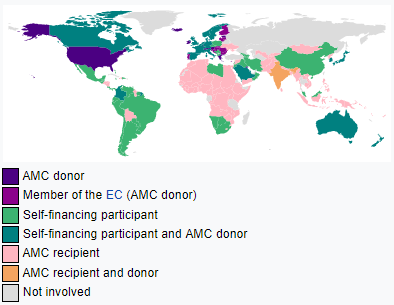



**How can COVAX ensure quick vaccine procurement?**
Normally, manufacturers are reluctant to risk making the significant investments needed to build or scale-up vaccine manufacturing facilities until they have received approval for a vaccine. But in the context of the current pandemic, which is costing the global economy US$ 375 billion every month, this would inevitably lead to significant delay and initially vaccine shortages once vaccines are licensed. To avoid this, the COVAX Facility is working with manufacturers to provide investments and incentives to ensure that manufacturers are ready to produce the doses we need as soon as a vaccine is approved. The Facility will also use the collective purchasing power that comes from having so many countries participate in order to negotiate highly competitive prices from manufacturers that are then passed on to participants.

Now that we know about COVAX, let's see how the actual vaccine procurement process has been working out using the data collected by the Duke Global Health Innovation Center

In [2]:
import numpy as np 
import pandas as pd 
import re
import os
from plotly import tools
import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving vaccine_procurement.csv to vaccine_procurement.csv


In [4]:
df=pd.read_csv('vaccine_procurement.csv')

In [5]:
df.head()

,Unnamed: 0,Company and Vaccine Name,License Holder,Company's Country,Purchaser Entity / Country,Purchaser's country Economic Status,Value of Deal (USD),Number of Doses Procured,COVID Burden (cases/million),Number of Doses Needed per Person,Number of people able to be vaccinated with doses procured,Population,% of national population able to be vaccinated,Doses intended to be purchased,Number of people able to be vaccinated with additional doses,% of national population able to be vaccinated with additional doses,Limited Regulatory Approval,Full Regulatory Approval,Agreement status
0,0,Oxford-AstraZeneca _AZD1222,SII,UK,African Union,Low income,NaN,"500,000,000","3,329",2.0,"250,000,000","1,359,998,350",18%,NaN,NaN,NaN,2/25/2021,NaN,Confirmed agreement
1,1,Oxford-AstraZeneca _AZD1222,SII,UK,Argentina,Upper middle income,NaN,"23,600,000","61,279",2.0,"11,800,000","44,938,712",26%,NaN,NaN,NaN,12/30/2020,NaN,Confirmed agreement
2,2,Oxford-AstraZeneca _AZD1222,AZ,UK,Australia,High income,NaN,"53,800,000","1,161",2.0,"26,900,000","25,364,307",106%,NaN,NaN,NaN,2/16/2021,NaN,Confirmed agreement
3,3,Oxford-AstraZeneca _AZD1222,SII,UK,Bangladesh,Lower middle income,"$87,000,000","33,000,000","4,445",2.0,"16,500,000","163,046,161",10%,NaN,NaN,NaN,1/4/2021,NaN,Confirmed agreement
4,4,Oxford-AstraZeneca _AZD1222,SII,UK,Bolivia,Lower middle income,NaN,"5,000,000","25,106",2.0,"2,500,000","11,513,100",22%,NaN,NaN,NaN,NaN,NaN,Confirmed agreement


In [6]:
#This dataset needs a lot of cleaning!
nan_vaccines=['Vector Institute_EpiVacCorona','Chumakov Centre_CoviVac','Chinese Academy of Medical Sciences_SARS-Cov-2']
df=df[~df['Company and Vaccine Name '].isin(nan_vaccines)]
df=df.replace('Sinopharm ','Sinopharm')
df=df.replace('Sinopharm(Wuhan) ','Sinopharm')
df=df.replace('Sinovac_Coronavac ','Sinovac_Coronavac')
df=df.replace('Oxford-AstraZeneca _AZD1222','Oxford-AstraZeneca')
df=df.replace('Pfizer-BioNTech_BNT162','Pfizer-BioNTech')
df=df.replace('Moderna_mRNA-1273','Moderna')
df=df.replace('Novavax_NVX-CoV2373','Novavax')
df=df.replace('Gamaleya Research Institute_Sputnik V','Sputnik_V')
df=df.replace('Janssen (J&J)_Ad26.COV2.S','Janssen(J&J)')
df=df.replace('Sanofi-GSK_SARS-CoV-2 Vaccine','Sanofi-GSK')
df=df.replace('CureVac_CVnCov','CureVac')
df=df.replace('Arcturus Therapeutics_LUNAR-COV19','Arcturus Therapeutics')
df=df.replace('Medicago_CoVLP','Medicago')
df=df.replace('COVAXX (United Biomedical)_UB-162','COVAXX')
df=df.replace('Valneva_VLA2001','Valneva')
df=df.replace('COVAX Vaccines','Covax')
df=df.replace('Bharat Biotech_COVAXIN','Bharat Biotech')
df=df.replace('CanSino Biologics_Ad5-nCoV','CanSino Biologics')
df=df.replace('Anhui Zhifei Longcom Biopharmaceutical (ZFSW)','Anhui Zhifei')

df["Purchaser Entity / Country"] = df["Purchaser Entity / Country"].str.rstrip()

df['Number of Doses Procured'] = df['Number of Doses Procured'].replace(np.nan,'0')
df[' Doses intended to be purchased  '] = df[' Doses intended to be purchased  '].replace(np.nan,'0')
df['Number of Doses Procured']= df['Number of Doses Procured'].str.replace(',','')
df['Number of Doses Procured']=pd.to_numeric(df['Number of Doses Procured'], errors='coerce')
df[' Doses intended to be purchased  ']= df[' Doses intended to be purchased  '].str.replace(',','')
df[' Doses intended to be purchased  ']=pd.to_numeric(df[' Doses intended to be purchased  '], errors='coerce')

df=df.replace(dict.fromkeys(['Low income ','Low income'], 'Low Income'), regex=True)
df=df.replace(dict.fromkeys(['Upper middle income ','Upper middle income'], 'Upper Middle Income'), regex=True)
df=df.replace(dict.fromkeys(['High income ','High income','High Income '], 'High Income'), regex=True)
df=df.replace(dict.fromkeys(['Lower middle income','Lower middle income ','lower middle income ','Lower Middle Income '], 'Lower Middle Income'), regex=True)
df=df.replace(dict.fromkeys(['Global Entity ','Global Entity'], 'Global Entity'), regex=True)
df=df.replace(dict.fromkeys(['Lower middle income','Lower middle income ','lower middle income ','Lower Middle Income '], 'Lower Middle Income'), regex=True)

Top 20 Countries who were able to procure the most vaccines

In [7]:
df_purchase=df[['Purchaser Entity / Country','Number of Doses Procured',' Doses intended to be purchased  ']]
df_purchase=df_purchase.groupby('Purchaser Entity / Country').sum()
df_purchase = df_purchase.sort_values('Number of Doses Procured')

In [18]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=df_purchase.index[-20:].values,
    x=df_purchase['Number of Doses Procured'][-20:].values,
    name='Number of Doses Procured',
    orientation='h',
    marker=dict(
        color='red',
        
    )
))
fig.add_trace(go.Bar(
    y=df_purchase.index[-20:].values,
    x=df_purchase[' Doses intended to be purchased  '][-20:].values,
    name='Doses intended to be purchased',
    orientation='h',
    marker=dict(
        color='blue',
        
    )
))
fig.update_layout(barmode='stack',height=600,width=1000,title='Market Commitment by top 20 countries'
    )
fig.show()

**USA and EU **top the list as they made their first purchases for Oxford-Astrazenca vaccine in May 2020.These were quickly followed by a slate of purchases by high-income and some middle-income countries and, by the end of the summer 2020, the UK, EU countries, and Canada had purchased enough doses through advance market commitments to cover more than their entire populations.

The first purchases for low-income countries came in January 2021, through the African Union's pooled procurement approach.

Many countries in Latin America, Africa, and Asia still have not yet been able to purchase enough vaccine to cover their populations.

In [9]:
from math import log, floor
def human_format(number):
    if number ==0:
        return 0
    else:
        units = ['', 'K', 'M', 'G', 'T', 'P']
        k = 1000.0
        magnitude = int(floor(log(number, k)))
        return str(int(number / k**magnitude))+ units[magnitude]

# Which vaccines were popular in major buyer countries?
Now, that we have looked at countries buying the most vaccines, let's also check the vaccines that these major buying countries have invested in.

In [10]:
subset=['China','India','Latin America w/o Brazil','Indonesia','Brazil','UK','African Union','COVAX','USA','EU']
df_vacc=df[df['Purchaser Entity / Country'].isin(subset)]
df_vacc=df_vacc[['Company and Vaccine Name ',"Company's Country",'Purchaser Entity / Country','Number of Doses Procured']]
df_vacc = df_vacc.groupby(['Company and Vaccine Name ','Purchaser Entity / Country',"Company's Country"]).sum().reset_index()
df_vacc_cont=pd.pivot_table(df_vacc,index=['Purchaser Entity / Country','Company and Vaccine Name ',"Company's Country"])
cm = sns.light_palette("#444224", as_cmap=True)
df_vacc_cont = df_vacc_cont.style.background_gradient(cmap=cm)
# df_vacc_cont['Number of Doses Procured']=df_vacc_cont['Number of Doses Procured'].apply(human_format)
df_vacc_cont

**How does a country's economic status influence it's buying power?**
Although it is obvious, that countries with good economic status would have procured much more vaccines than countries on the other side of the spectrum. Let's still look at the trends in vaccines purchased so far and vaccines intended to be purchased.

In [11]:
df_status=df[["Purchaser's country Economic  Status ","Number of Doses Procured",' Doses intended to be purchased  ']].groupby("Purchaser's country Economic  Status ").sum()
df_status.columns=['doses_procured','potential_dose_purchase']

In [12]:
trace1=go.Bar(
x= df_status.index,
y= df_status['doses_procured'],
name='Number of Doses Procured',
marker=dict(
    color=['#a0937d','#e1701a','#f7a440','#f6dcbf','#a35709']))
trace2=go.Bar(
x= df_status.index,
y=df_status['potential_dose_purchase'],
name='Doses intended to be purchased',
marker=dict(
        color=['#a0937d','#e1701a','#f7a440','#f6dcbf','#a35709']))
fig = plotly.subplots.make_subplots(rows=1, cols=2,subplot_titles=('Confirmed Doses procured','Doses intented to be purchased'))
fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)

fig['layout'].update(height=600, width=800,plot_bgcolor='#faf3f3',showlegend=False,title='Market Commitment by Economic Status')
iplot(fig)

**In 2020, many high-income countries** hedged their bets by purchasing enough doses to vaccinate their populations several times over, even before any candidates were approved and have continued to procure more doses of approved vaccines in 2021, in an effort to receive doses as quickly as possible.
Because of global manufacturing constraints, the direct deals made by high-income (and some middle-income) countries mean that a smaller piece of the pie is available for low- and middle-income countries and for equity-focused partnerships like COVAX in 2021.
**COVAX aims to provide around** two billion doses by the end of 2021 to protect high-risk populations around the world. However, it is far from achieving this goal. Many high-income countries funded COVAX but also preferred to take on deals, so invested early in multiple vaccines, securing a place at the front of the production line.

Forced to compete with wealthy nations for the limited number of doses coming out in 2021, COVAX has struggled to shore up sufficient supply. COVAX deliveries began in February 2021 but, shortly after, faxed significant supply shortages, in part stemming from India's export restrictions.

In [13]:
df['% of national population able to be vaccinated ']=df['% of national population able to be vaccinated '].str.replace('%','')
df['% of national population able to be vaccinated ']=pd.to_numeric(df['% of national population able to be vaccinated '])
df_pop_covered=df[["Purchaser's country Economic  Status ","% of national population able to be vaccinated "]].groupby("Purchaser's country Economic  Status ").mean()

df_pop_covered.columns=['percent_population_able_to_be_vaccinated']

In [14]:
colors=['#e1701a','#f7a440','#f6dcbf','#a35709']
fig = go.Figure(data=[go.Bar(
    x=df_pop_covered.index[1:],
    y=df_pop_covered['percent_population_able_to_be_vaccinated'][1:].values,
     marker_color=colors ,text=df_pop_covered['percent_population_able_to_be_vaccinated'][1:].values
)],layout=go.Layout(width=800,
    height=500))
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside')
fig.update_layout(title_text='% population able to be vaccinated from doses procured',plot_bgcolor='#faf3f3')

**Does the economic status of a country decide the vaccines they'll invest in?**

In [15]:
df_vacc_status=df[['Company and Vaccine Name ',"Purchaser's country Economic  Status ",'Number of Doses Procured']].groupby(['Company and Vaccine Name ',"Purchaser's country Economic  Status "]).sum()
df_vacc_status=pd.pivot_table(df_vacc_status,index=['Company and Vaccine Name '],columns=["Purchaser's country Economic  Status "])
df_vacc_status=df_vacc_status.replace(np.nan,0)
df_vacc_status.columns=['Global Entity','High Income','Low Income','Lower Middle Income','Upper Middle Income']
df_vacc_status['total']=df_vacc_status.sum(axis=1)
df_vacc_status=df_vacc_status.sort_values('total')

In [16]:
fig.add_trace(go.Bar(
    y=df_vacc_status.index[-20:].values,
    x=df_vacc_status['Global Entity'][-20:].values,
    name='Global Entity/COVAX',
    orientation='h',
    marker=dict(
        color='#a0937d',
        
    )
))
fig.add_trace(go.Bar(
    y=df_vacc_status.index[-20:].values,
    x=df_vacc_status['High Income'][-20:].values,
    name='High Income',
    orientation='h',
    marker=dict(
        color='#e1701a',
        
    )
))
fig.add_trace(go.Bar(
    y=df_vacc_status.index[-20:].values,
    x=df_vacc_status['Low Income'][-20:].values,
    name='Low Income',
    orientation='h',
    marker=dict(
        color='#f7a440',
        
    )
))
fig.add_trace(go.Bar(
    y=df_vacc_status.index[-20:].values,
    x=df_vacc_status['Lower Middle Income'][-20:].values,
    name='Lower Middle Income',
    orientation='h',
    marker=dict(
        color='#f6dcbf',
        
    )
))
fig.add_trace(go.Bar(
    y=df_vacc_status.index[-20:].values,
    x=df_vacc_status['Upper Middle Income'][-20:].values,
    name='Upper Middle Income',
    orientation='h',
    marker=dict(
        color='#a35709',
        
    )
))

fig.update_layout(barmode='stack',plot_bgcolor='#faf3f3',height=600,width=1000,title='Vaccine Investment by Economic Status')
fig.show()